In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score

import matplotlib as plt
#import tensorflow as tf

In [2]:
# matplotlib
%matplotlib inline
import matplotlib
#matplotlib.rcParams.update({'font.size': 4})
matplotlib.rcParams["figure.dpi"] = 125

#set the font for matplotlib
from matplotlib import style
style.use('fivethirtyeight')

from matplotlib import figure
# Pandas and Numpy
import numpy as np
import pandas as pd
import pandas_profiling as pp

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import psycopg2

In [17]:
#import connection string (youll need to create this)
from config import conn

# create the engine
engine = create_engine(conn)
Base = automap_base()

# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the tables
#us_data = Base.classes.us_data_df_v2
us_data = Base.classes.us_data_df_v3
#us_data = Base.classes.us_data_df_v2_lag14
#us_data = Base.classes.us_data_df_v2_lag30
#us_data = Base.classes.us_data_df_v2_lag90
#us_data = Base.classes.us_data_df_v2_lag365
#Historical_Price = Base.classes.historical_price_by_day

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [19]:
#create df from Recession_Indicator table
results = []

results = session.query(us_data.intdate, \
                        us_data.ri, \
                        us_data.cpi, \
                        us_data.gdp, \
                        us_data.inf, \
                        us_data.unp, \
                        us_data.dji_open, \
                        #us_data.dji_open_lag1, \
                        #us_data.dji_open_lag7, \
                        #us_data.dji_open_lag14, \
                        us_data.dji_open_lag30, \
                        us_data.dji_open_lag90, \
                        us_data.dji_open_lag365, \
                        us_data.dji_close, \
                        #us_data.dji_close_lag1, \
                        #us_data.dji_close_lag7, \
                        #us_data.dji_close_lag14, \
                        us_data.dji_close_lag30, \
                        us_data.dji_close_lag90, \
                        us_data.dji_close_lag365, \
                        #us_data.dji_opcl_diff, \
                        #us_data.dji_opcl_diff_lag1, \
                        #us_data.dji_opcl_diff_lag7, \
                        #us_data.dji_opcl_diff_lag14, \
                        #us_data.dji_opcl_diff_lag30, \
                        #us_data.dji_opcl_diff_lag90, \
                        #us_data.dji_opcl_diff_lag365, \
                        us_data.dji_high, \
                        #us_data.dji_high_lag1, \
                        #us_data.dji_high_lag7, \
                        #us_data.dji_high_lag14, \
                        us_data.dji_high_lag30, \
                        us_data.dji_high_lag90, \
                        us_data.dji_high_lag365, \
                        us_data.dji_low, \
                        #us_data.dji_low_lag1, \
                        #us_data.dji_low_lag7, \
                        #us_data.dji_low_lag14, \
                        us_data.dji_low_lag30, \
                        us_data.dji_low_lag90, \
                        us_data.dji_low_lag365, \
                        #us_data.dji_hilo_diff, \
                        #us_data.dji_hilo_diff_lag1, \
                        #us_data.dji_hilo_diff_lag7, \
                        #us_data.dji_hilo_diff_lag14, \
                        #us_data.dji_hilo_diff_lag30, \
                        #us_data.dji_hilo_diff_lag90, \
                        #us_data.dji_hilo_diff_lag365
                       )


data_df = pd.DataFrame(results)
data_df.head()

intdate     ri        cpi       gdp       inf       unp      dji_open  \
0  19701231  False  16.792044       NaN  5.838255       NaN  838.92000000   
1  19710104  False  16.834236  1135.156  4.292767  5.994841  830.57000000   
2  19710105  False  16.834236  1135.156  4.292767  5.997475  835.77000000   
3  19710106  False  16.834236  1135.156  4.292767  6.007436  837.97000000   
4  19710107  False  16.834236  1135.156  4.292767  6.121167  837.83000000   

  dji_open_lag30 dji_open_lag90 dji_open_lag365  ... dji_close_lag90  \
0           None           None            None  ...            None   
1           None           None            None  ...            None   
2           None           None            None  ...            None   
3           None           None            None  ...            None   
4           None           None            None  ...            None   

  dji_close_lag365      dji_high dji_high_lag30 dji_high_lag90  \
0             None  838.92000000           None           None   
1             None  830.57000000           None           None   
2             None  835.77000000           None           None   
3             None  837.97000000           None           None   
4             None  837.83000000           None           None   

  dji_high_lag365       dji_low dji_low_lag30 dji_low_lag90 dji_low_lag365  
0            None  838.92000000          None          None           None  
1            None  830.57000000          None          None           None  
2            None  835.77000000          None          None           None  
3            None  837.97000000          None          None           None  
4            None  837.83000000          None          None           None  

[5 rows x 22 columns]

In [20]:
# CSV Import our input dataset
#data_df = pd.read_csv('us_data_df_v2.csv')
# Fill in the empty rows with "0". (4.5.2)
#data_df.fillna(0)
#data_df = data_df.dropna()
#data_df.head()

In [23]:
# convert to float
data_df[['dji_open', \
            'dji_open_lag30', \
            'dji_open_lag90', \
            'dji_open_lag365', \
            'dji_close', \
            'dji_close_lag30', \
            'dji_close_lag90', \
            'dji_close_lag365', \
            'dji_high', \
            'dji_high_lag30', \
            'dji_high_lag90', \
            'dji_high_lag365', \
            'dji_low', \
            'dji_low_lag30', \
            'dji_low_lag90', \
            'dji_low_lag365']] \
            =data_df[['dji_open', \
                    'dji_open_lag30', \
                    'dji_open_lag90', \
                    'dji_open_lag365', \
                    'dji_close', \
                    'dji_close_lag30', \
                    'dji_close_lag90', \
                    'dji_close_lag365', \
                    'dji_high', \
                    'dji_high_lag30', \
                    'dji_high_lag90', \
                    'dji_high_lag365', \
                    'dji_low', \
                    'dji_low_lag30', \
                    'dji_low_lag90', \
                    'dji_low_lag365']].astype(float)


data_df = pd.get_dummies(data_df, columns=["ri"])
data_df.head()

intdate        cpi       gdp       inf       unp  dji_open  \
0  19701231  16.792044       NaN  5.838255       NaN    838.92   
1  19710104  16.834236  1135.156  4.292767  5.994841    830.57   
2  19710105  16.834236  1135.156  4.292767  5.997475    835.77   
3  19710106  16.834236  1135.156  4.292767  6.007436    837.97   
4  19710107  16.834236  1135.156  4.292767  6.121167    837.83   

   dji_open_lag30  dji_open_lag90  dji_open_lag365  dji_close  ...  dji_high  \
0             NaN             NaN              NaN     838.92  ...    838.92   
1             NaN             NaN              NaN     830.57  ...    830.57   
2             NaN             NaN              NaN     835.77  ...    835.77   
3             NaN             NaN              NaN     837.97  ...    837.97   
4             NaN             NaN              NaN     837.83  ...    837.83   

   dji_high_lag30  dji_high_lag90  dji_high_lag365  dji_low  dji_low_lag30  \
0             NaN             NaN              NaN   838.92            NaN   
1             NaN             NaN              NaN   830.57            NaN   
2             NaN             NaN              NaN   835.77            NaN   
3             NaN             NaN              NaN   837.97            NaN   
4             NaN             NaN              NaN   837.83            NaN   

   dji_low_lag90  dji_low_lag365  ri_False  ri_True  
0            NaN             NaN         1        0  
1            NaN             NaN         1        0  
2            NaN             NaN         1        0  
3            NaN             NaN         1        0  
4            NaN             NaN         1        0  

[5 rows x 23 columns]

In [24]:
#data_df = data_df.dropna()
data_df = data_df.fillna(0)
data_df.head()

intdate        cpi       gdp       inf       unp  dji_open  \
0  19701231  16.792044     0.000  5.838255  0.000000    838.92   
1  19710104  16.834236  1135.156  4.292767  5.994841    830.57   
2  19710105  16.834236  1135.156  4.292767  5.997475    835.77   
3  19710106  16.834236  1135.156  4.292767  6.007436    837.97   
4  19710107  16.834236  1135.156  4.292767  6.121167    837.83   

   dji_open_lag30  dji_open_lag90  dji_open_lag365  dji_close  ...  dji_high  \
0             0.0             0.0              0.0     838.92  ...    838.92   
1             0.0             0.0              0.0     830.57  ...    830.57   
2             0.0             0.0              0.0     835.77  ...    835.77   
3             0.0             0.0              0.0     837.97  ...    837.97   
4             0.0             0.0              0.0     837.83  ...    837.83   

   dji_high_lag30  dji_high_lag90  dji_high_lag365  dji_low  dji_low_lag30  \
0             0.0             0.0              0.0   838.92            0.0   
1             0.0             0.0              0.0   830.57            0.0   
2             0.0             0.0              0.0   835.77            0.0   
3             0.0             0.0              0.0   837.97            0.0   
4             0.0             0.0              0.0   837.83            0.0   

   dji_low_lag90  dji_low_lag365  ri_False  ri_True  
0            0.0             0.0         1        0  
1            0.0             0.0         1        0  
2            0.0             0.0         1        0  
3            0.0             0.0         1        0  
4            0.0             0.0         1        0  

[5 rows x 23 columns]

In [26]:
# drop ri_False and rename ri_True ri
data_df = data_df.drop({"ri_False"}, axis=1).rename(columns={'ri_True':'ri'})

data_df.dtypes

intdate               int64
cpi                 float64
gdp                 float64
inf                 float64
unp                 float64
dji_open            float64
dji_open_lag30      float64
dji_open_lag90      float64
dji_open_lag365     float64
dji_close           float64
dji_close_lag30     float64
dji_close_lag90     float64
dji_close_lag365    float64
dji_high            float64
dji_high_lag30      float64
dji_high_lag90      float64
dji_high_lag365     float64
dji_low             float64
dji_low_lag30       float64
dji_low_lag90       float64
dji_low_lag365      float64
ri                    uint8
dtype: object

## Data Insights

In [136]:
# EDA on Data Table, showing 370 observations and 9 characteristics
#data_df.shape

In [101]:
# EDA to see label of each column
#data_df.columns.values 

array(['intdate', 'cpi', 'gdp', 'inf', 'unp', 'dji_open', 'dji_open_lag1',
       'dji_open_lag7', 'dji_open_lag14', 'dji_open_lag30',
       'dji_open_lag90', 'dji_open_lag365', 'dji_close', 'dji_close_lag1',
       'dji_close_lag7', 'dji_close_lag14', 'dji_close_lag30',
       'dji_close_lag90', 'dji_close_lag365', 'dji_opcl_diff',
       'dji_opcl_diff_lag1', 'dji_opcl_diff_lag7', 'dji_opcl_diff_lag14',
       'dji_opcl_diff_lag30', 'dji_opcl_diff_lag90',
       'dji_opcl_diff_lag365', 'dji_high', 'dji_high_lag1',
       'dji_high_lag7', 'dji_high_lag14', 'dji_high_lag30',
       'dji_high_lag90', 'dji_high_lag365', 'dji_low', 'dji_low_lag1',
       'dji_low_lag7', 'dji_low_lag14', 'dji_low_lag30', 'dji_low_lag90',
       'dji_low_lag365', 'dji_hilo_diff', 'dji_hilo_diff_lag1',
       'dji_hilo_diff_lag7', 'dji_hilo_diff_lag14', 'dji_hilo_diff_lag30',
       'dji_hilo_diff_lag90', 'dji_hilo_diff_lag365', 'ri'], dtype=object)

In [38]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12399 entries, 0 to 12398
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   intdate        12399 non-null  int64  
 1   cpi            12399 non-null  float64
 2   cpi_lag        12399 non-null  float64
 3   gdp            12399 non-null  float64
 4   gdp_lag        12399 non-null  float64
 5   inf            12399 non-null  float64
 6   inf_lag        12399 non-null  float64
 7   unp            12399 non-null  float64
 8   unp_lag        12399 non-null  float64
 9   dji_open       12399 non-null  float64
 10  dji_open_lag   12399 non-null  float64
 11  dji_close      12399 non-null  float64
 12  dji_close_lag  12399 non-null  float64
 13  dji_opcl_diff  12399 non-null  float64
 14  dji_opcl_lag   12399 non-null  float64
 15  dji_high       12399 non-null  float64
 16  dji_high_lag   12399 non-null  float64
 17  dji_low        12399 non-null  float64
 18  dji_lo

- Data has only object values
- No variable column has null or missing values

## Summary Statistics

In [39]:
# EDA on Historical Price Table, beginning with basic statistics
data_df.describe()

intdate           cpi       cpi_lag           gdp       gdp_lag  \
count  1.239900e+04  12399.000000  12399.000000  12399.000000  12399.000000   
mean   1.995123e+07     63.291900     63.230196   2991.331013   2991.331013   
std    1.418788e+05     27.419089     27.438467   5451.283110   5451.283110   
min    1.970123e+07     16.792044      0.000000      0.000000      0.000000   
25%    1.983041e+07     41.684774     41.389436      0.000000      0.000000   
50%    1.995071e+07     64.383567     64.383567      0.000000      0.000000   
75%    2.007110e+07     88.953113     88.259492   3578.848000   3578.848000   
max    2.020023e+07    109.295958    109.295958  21729.124000  21729.124000   

                inf       inf_lag           unp       unp_lag      dji_open  \
count  12399.000000  12399.000000  12399.000000  12399.000000  12399.000000   
mean       3.914089      3.914089      0.191612      0.191612   7335.375608   
std        2.930475      2.930475      1.114408      1.114408   6894.321945   
min       -0.355546     -0.355546      0.000000      0.000000    577.600000   
25%        2.188027      2.188027      0.000000      0.000000   1116.765000   
50%        3.156842      3.156842      0.000000      0.000000   4614.780000   
75%        4.300535      4.300535      0.000000      0.000000  11014.780000   
max       13.549202     13.549202     11.006776     11.006776  29440.470000   

       ...  dji_close_lag  dji_opcl_diff  dji_opcl_lag      dji_high  \
count  ...   12399.000000   12399.000000  12399.000000  12399.000000   
mean   ...    7321.070907       1.131071      1.328789   7392.158310   
std    ...    6881.050766      85.183810     84.335861   6931.764989   
min    ...       0.000000   -1041.840000  -1041.840000    577.600000   
25%    ...    1114.530000       0.000000      0.000000   1127.035000   
50%    ...    4585.840000       0.000000      0.000000   4646.130000   
75%    ...   11013.995000       0.000000      0.000000  11153.605000   
max    ...   29551.420000    1020.720000   1020.720000  29568.570000   

       dji_high_lag       dji_low   dji_low_lag  dji_hilo_diff  dji_hilo_lag  \
count  12399.000000  12399.000000  12399.000000   12399.000000  12399.000000   
mean    7376.440959   7276.952230   7261.621380     115.206080    114.819579   
std     6916.863521   6855.776187   6841.565154     124.727548    123.809899   
min        0.000000    577.600000      0.000000       0.000000      0.000000   
25%     1123.890000   1106.465000   1104.985000      19.255000     19.195000   
50%     4618.300000   4578.510000   4549.180000      71.140000     70.980000   
75%    11148.045000  10897.000000  10888.750000     176.355000    176.075000   
max    29568.570000  29406.750000  29406.750000    1596.650000   1596.650000   

                 ri  
count  12399.000000  
mean       0.457053  
std        0.498172  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

[8 rows x 22 columns]

### Key Observations
- dataset comprises of 64,708 observations and 4 chracteriestics
- out of which x is dependent variable and the remaining x are independent variables
- Data needs to be redone.  Not capturing mean, Standard deviation etc

In [40]:
# EDA on Historical Price Table continued with pandas-profiling
#
#   UNCOMMENT FOR FINAL 
#
#pp.ProfileReport(data_df)

## EDA Data Visualizations


In [27]:
#copy data_df into X and drop recession indicator
X = data_df.copy()
X = X.drop("ri", axis=1)

X.head()

intdate        cpi       gdp       inf       unp  dji_open  \
0  19701231  16.792044     0.000  5.838255  0.000000    838.92   
1  19710104  16.834236  1135.156  4.292767  5.994841    830.57   
2  19710105  16.834236  1135.156  4.292767  5.997475    835.77   
3  19710106  16.834236  1135.156  4.292767  6.007436    837.97   
4  19710107  16.834236  1135.156  4.292767  6.121167    837.83   

   dji_open_lag30  dji_open_lag90  dji_open_lag365  dji_close  ...  \
0             0.0             0.0              0.0     838.92  ...   
1             0.0             0.0              0.0     830.57  ...   
2             0.0             0.0              0.0     835.77  ...   
3             0.0             0.0              0.0     837.97  ...   
4             0.0             0.0              0.0     837.83  ...   

   dji_close_lag90  dji_close_lag365  dji_high  dji_high_lag30  \
0              0.0               0.0    838.92             0.0   
1              0.0               0.0    830.57             0.0   
2              0.0               0.0    835.77             0.0   
3              0.0               0.0    837.97             0.0   
4              0.0               0.0    837.83             0.0   

   dji_high_lag90  dji_high_lag365  dji_low  dji_low_lag30  dji_low_lag90  \
0             0.0              0.0   838.92            0.0            0.0   
1             0.0              0.0   830.57            0.0            0.0   
2             0.0              0.0   835.77            0.0            0.0   
3             0.0              0.0   837.97            0.0            0.0   
4             0.0              0.0   837.83            0.0            0.0   

   dji_low_lag365  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 21 columns]

In [28]:
#copy recesison indicator and convert to data frame
y_cols = data_df["ri"] 

y = pd.DataFrame()

y["ri"] = y_cols
y.head()

ri
0   0
1   0
2   0
3   0
4   0

In [29]:
y['ri'].value_counts()

0    6732
1    5667
Name: ri, dtype: int64

In [30]:
# Create X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cols, random_state=1)

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs", max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")



 Logistic regression model accuracy: 0.621


In [32]:

from sklearn.metrics import confusion_matrix, classification_report

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

Predicted 0  Predicted 1
Actual 0         1477          206
Actual 1          969          448

In [33]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.88      0.72      1683
           1       0.69      0.32      0.43      1417

    accuracy                           0.62      3100
   macro avg       0.64      0.60      0.57      3100
weighted avg       0.64      0.62      0.59      3100



## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)
# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [35]:
# Create a random forest classifier. (17.8.3)
rf_model = RandomForestClassifier(n_estimators=128, random_state=78, max_depth=4) 

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data.
#predictions = rf_model.predict(X_train_scaled)
predictions = rf_model.predict(X_test_scaled)

In [36]:
# Calculating the confusion matrix.
#cm = confusion_matrix(y_train, predictions)
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

Predicted 0  Predicted 1
Actual 0         1614           69
Actual 1          489          928

In [37]:
# Calculating the accuracy score.
#acc_score = accuracy_score(y_train, predictions)
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
#print(classification_report(y_train, predictions))
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0         1614           69
Actual 1          489          928

Accuracy Score : 0.82
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.96      0.85      1683
           1       0.93      0.65      0.77      1417

    accuracy                           0.82      3100
   macro avg       0.85      0.81      0.81      3100
weighted avg       0.84      0.82      0.81      3100



In [38]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_

# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
#X.columns

[(0.2531638473195009, 'inf'),
 (0.13433976888805868, 'intdate'),
 (0.1031444241271965, 'cpi'),
 (0.07625887386919805, 'dji_high'),
 (0.07107987827748025, 'dji_open_lag365'),
 (0.061170885805917743, 'dji_low_lag365'),
 (0.05895256221385666, 'dji_high_lag365'),
 (0.05618803764090627, 'dji_close_lag365'),
 (0.04644573339730473, 'dji_open'),
 (0.04008968447693868, 'dji_low'),
 (0.029911066672876473, 'dji_close'),
 (0.01728911960149286, 'dji_close_lag90'),
 (0.014149948785290948, 'dji_open_lag90'),
 (0.013043900202432698, 'dji_high_lag90'),
 (0.012536760250159167, 'dji_low_lag90'),
 (0.005192419627029253, 'gdp'),
 (0.003928476227320115, 'dji_high_lag30'),
 (0.0012985022414755344, 'dji_open_lag30'),
 (0.0011436034214685146, 'dji_low_lag30'),
 (0.000397430030051512, 'dji_close_lag30'),
 (0.0002750769240444518, 'unp')]

## Principal Component Analysis (PCA)

In [39]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas

In [40]:
# Initialize PCA model
pca = PCA(n_components=5)

In [41]:
# Get two principal components for the iris data.
data_pca = pca.fit_transform(X_train_scaled)

In [42]:
# Transform PCA data to a DataFrame
data_pca_df = pd.DataFrame(data = data_pca, columns =["PC1", "PC2", "PC3","PC4", "PC5"])
data_pca_df.head()

PC1       PC2       PC3       PC4       PC5
0  9.727466 -2.121801 -1.688983 -1.541105 -0.639757
1 -2.270465 -0.650028 -0.159670  0.249672  0.123205
2 -2.757440 -1.703379 -0.777414  0.243813  0.050707
3 -2.069919 -0.903317 -0.110975 -0.209239 -0.296695
4 -2.372320 -1.573776 -0.426845 -0.149146 -0.101739

In [43]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.48628773, 0.21508225, 0.10525654, 0.06847858, 0.05287087])

In [44]:
#https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
#abs( pca.components_[0] )

# Create pca components and sorted pca components series
components_series = {#'pca_comps':abs(pca.components_[0]), 'col_names': X.columns, 
                     'sorted_pca_comps and col_names': sorted(zip(abs( pca.components_[0] ), X.columns), reverse=True)}

# Convert series into dataframe with index
components_series_df = pd.DataFrame(components_series)
components_series_df

sorted_pca_comps and col_names
0            (0.2557213542490248, dji_low)
1     (0.2552634634460629, dji_low_lag365)
2          (0.2551818819639341, dji_close)
3           (0.2550888614559341, dji_open)
4          (0.25457762552233676, dji_high)
5   (0.2537999113534586, dji_close_lag365)
6    (0.2532818972422155, dji_open_lag365)
7   (0.25182379616490047, dji_high_lag365)
8    (0.23530825936230693, dji_high_lag90)
9     (0.234259486426766, dji_close_lag90)
10   (0.23387739842686361, dji_open_lag90)
11    (0.23303934191499434, dji_low_lag90)
12          (0.22662355652259888, intdate)
13              (0.22313636816151988, cpi)
14   (0.18401313554535656, dji_high_lag30)
15   (0.17953886325933777, dji_open_lag30)
16  (0.17832386120999486, dji_close_lag30)
17     (0.1752650804801251, dji_low_lag30)
18              (0.16121318150966613, inf)
19              (0.08639672024152203, gdp)
20           (0.00016397954330827445, unp)

In [123]:
# Find the best value for K
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
	km = KMeans(n_clusters=i, random_state=0)
	km.fit(data_pca_df)
	inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [124]:
# Initialize the K-means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(data_pca_df)

# Predict clusters
predictions = model.predict(data_pca_df)

# Add the predicted class columns
data_pca_df["class"] = model.labels_
data_pca_df.head()
#data_pca_df["class"].value_counts

PC1       PC2       PC3       PC4       PC5  class
0 -8.153572  4.331665 -0.315703  3.760214 -2.574443      2
1  1.859121 -1.627767 -0.455550  0.292579 -0.207645      0
2  1.656590 -2.618460 -0.940440  1.006180 -0.038347      0
3  1.667488 -1.589991 -0.470524  0.576813 -0.106334      0
4  1.626932 -2.180800 -0.857030  0.998836 -0.131869      0

In [125]:
data_pca_df.hvplot.scatter(
	x="PC1",
	y="PC2",
	hover_cols=["class"],
	by="class",
)

:NdOverlay   [class]
   :Scatter   [PC1]   (PC2,class)

In [127]:
import plotly.express as px
# Plotting the clusters with three features
fig = px.scatter_3d(data_pca_df, 
                    x="PC1", y="PC2", z="PC3", 
                    color="class", symbol="class", width=800)
fig.update_layout(legend=dict(x=0,y=1))
fig.show()

In [53]:
import graphviz
from sklearn import tree
#for tree_in_forest in rf_model.estimators_:
classification_tree = tree.export_graphviz(rf_model.estimators_[0], out_file=None, 
                      feature_names=X.columns,  
                      class_names=["0","1"],  
                      filled=True)
graph = graphviz.Source(classification_tree) 
graph

ExecutableNotFound: failed to execute ['dot.bat', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

## Check for missing values

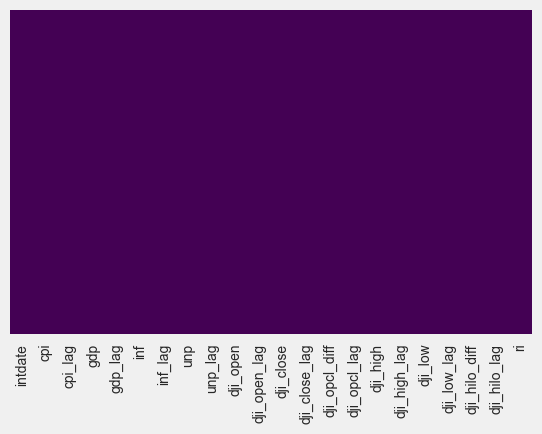

In [56]:
import seaborn as sns
sns.heatmap(data_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

## Checking Correlation

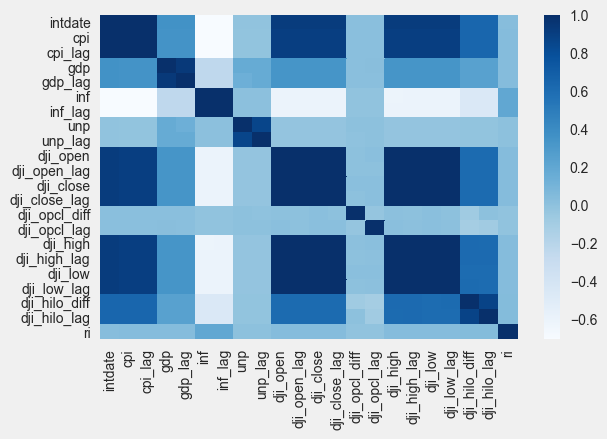

In [57]:
#plt.figure(figsize=(10,10))
figure.Figure(figsize=(10,10))
sns.heatmap(data_df.corr(),cmap='Blues',annot=False)

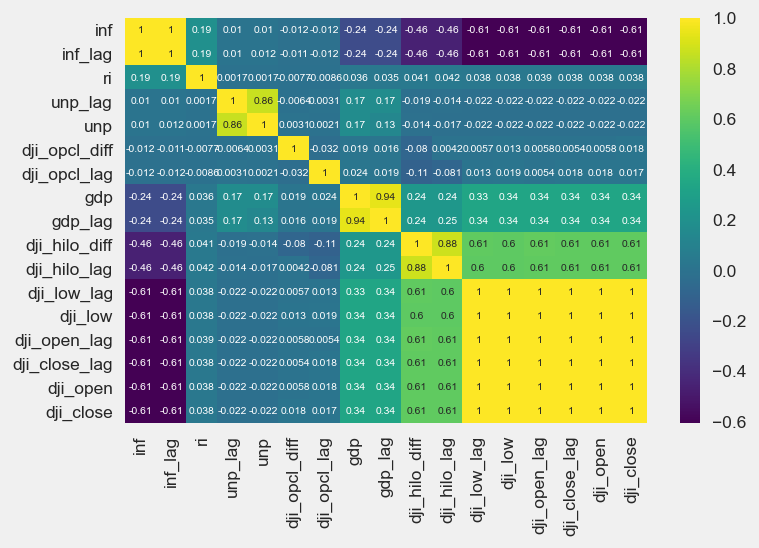

In [62]:
#Quality correlation matrix

matplotlib.rcParams.update({'font.size': 6})

k = 17# number of variables for heatmap
cols = data_df.corr().nlargest(k, 'inf')['inf'].index
cm = data_df[cols].corr()
#plt.figure(figsize=(10,10))
figure.Figure(figsize=(10,100))
sns.heatmap(cm, annot=True, cmap = 'viridis')

## Checking for outliers

In [ ]:
import matplotlib.pyplot as plt

l = data_df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,.75
                    *number_of_rows))
for i in range(0,len(l)):
    plt.plot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data_df[l[i]],color='red',orient='h')
    plt.tight_layout()

## Checking skewness

In [ ]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(data_df[l[i]],kde=True) 